In [37]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [127]:
zip_file_path = "timothy_2.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_3 = pd.read_csv(f, low_memory=False)

df_3.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,LabSamplePreparationMethod/MethodQualifierTypeName,LabSamplePreparationMethod/MethodDescriptionText,PreparationStartDate,PreparationStartTime/Time,PreparationStartTime/TimeZoneCode,PreparationEndDate,PreparationEndTime/Time,PreparationEndTime/TimeZoneCode,SubstitutionDilutionFactorNumeric,ProviderName
0,USGS-CA,USGS California Water Science Center,nwisca.01.97509221,Sample-Routine,Water,Groundwater,1974-10-15,10:00:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,nwisca.01.97509221,Sample-Routine,Water,Groundwater,1974-10-15,10:00:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,nwisca.01.97509239,Sample-Routine,Water,Groundwater,1975-07-23,13:20:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,nwisca.01.97509239,Sample-Routine,Water,Groundwater,1975-07-23,13:20:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,nwisca.01.97605964,Sample-Routine,Water,Groundwater,1975-11-05,14:10:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


In [166]:
df_3["CharacteristicName"].value_counts()

df_3 = df_3.dropna(subset=["ResultMeasureValue"])
df_3['ResultMeasureValue'] = pd.to_numeric(df_3['ResultMeasureValue'], errors='coerce')
df_3.head()

df_3_pivot = df_3.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

df_3_pivot.merge()

CharacteristicName,ActivityIdentifier,Calcium,Magnesium,Potassium,Sodium,Sodium plus potassium,"Sodium, percent total cations"
0,CALWR_WQX-BL00B100567,17.0,13.0,NaN,58.0,NaN,NaN
1,CALWR_WQX-BL00B100614,33.0,23.0,NaN,22.0,NaN,NaN
2,CALWR_WQX-BL00B103693,17.0,13.0,NaN,67.0,NaN,NaN
3,CALWR_WQX-BL00B103710,33.0,22.0,NaN,22.0,NaN,NaN
4,CALWR_WQX-BL00B107160,34.0,22.0,NaN,28.0,NaN,NaN
...,...,...,...,...,...,...,...
2934,nwisca.01.98302966,48.0,27.0,1.60,150.0,NaN,58.0
2935,nwisca.01.98302970,23.0,27.0,1.00,250.0,NaN,76.0
2936,nwisca.01.98302972,110.0,36.0,1.20,95.0,NaN,33.0
2937,nwisca.01.98302976,110.0,29.0,0.80,68.0,NaN,27.0


In [167]:
additional_info = df_3[['ActivityIdentifier', 'ProjectIdentifier', 
                               'ActivityStartDate', "ActivityStartTime/Time_PST", 
                                'LongitudeMeasure', 'LatitudeMeasure']].drop_duplicates()

df_3_pivot = df_3_pivot.merge(additional_info, on='ActivityIdentifier', how='left')

KeyError: "['ActivityStartTime/Time_PST', 'LongitudeMeasure', 'LatitudeMeasure'] not in index"

In [136]:
df_3_pivot = df_3_pivot[['Magnesium', 'Sodium', 'Sodium, percent total cations', 'Potassium', 'Calcium']].dropna(axis = 0)
df_3_pivot

CharacteristicName,Magnesium,Sodium,"Sodium, percent total cations",Potassium,Calcium
332,4.32,6.19,21.0,0.57,12.7
333,52.10,79.30,24.0,2.59,129.0
334,35.90,85.10,31.0,2.84,106.0
335,32.60,83.70,32.0,2.56,96.6
336,24.40,86.80,40.0,2.17,72.7
...,...,...,...,...,...
2934,27.00,150.00,58.0,1.60,48.0
2935,27.00,250.00,76.0,1.00,23.0
2936,36.00,95.00,33.0,1.20,110.0
2937,29.00,68.00,27.0,0.80,110.0


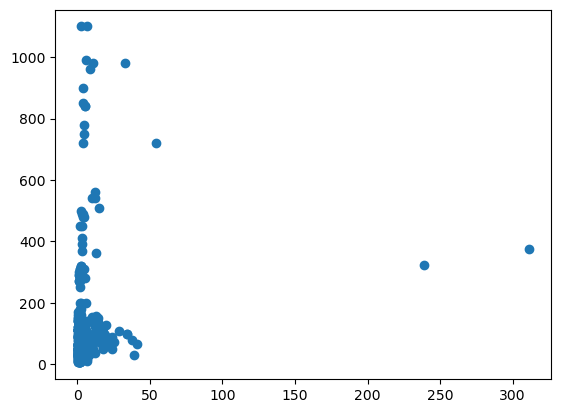

In [145]:
plt.scatter(df_3_pivot["Potassium"], df_3_pivot["Calcium"])

Mean Squared Error: 2258.57196847835
R² Score: 0.14297224964911892


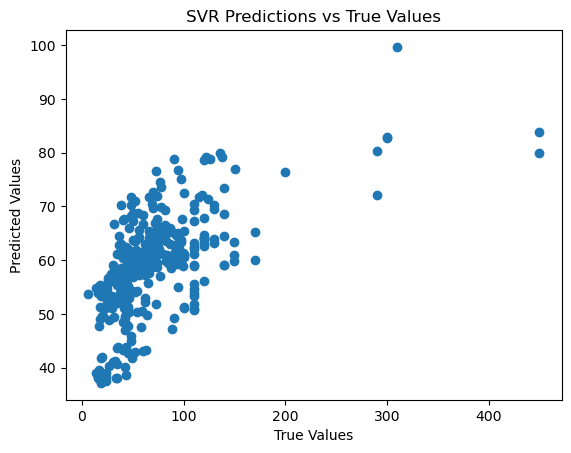

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df_3_pivot[['Magnesium', 'Sodium', 'Sodium, percent total cations', 'Potassium']]
y = df_3_pivot['Calcium']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF kernel is good for non-linear data
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot predictions vs true values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs True Values")
plt.show()


/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_94900/2624553294.py:19: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


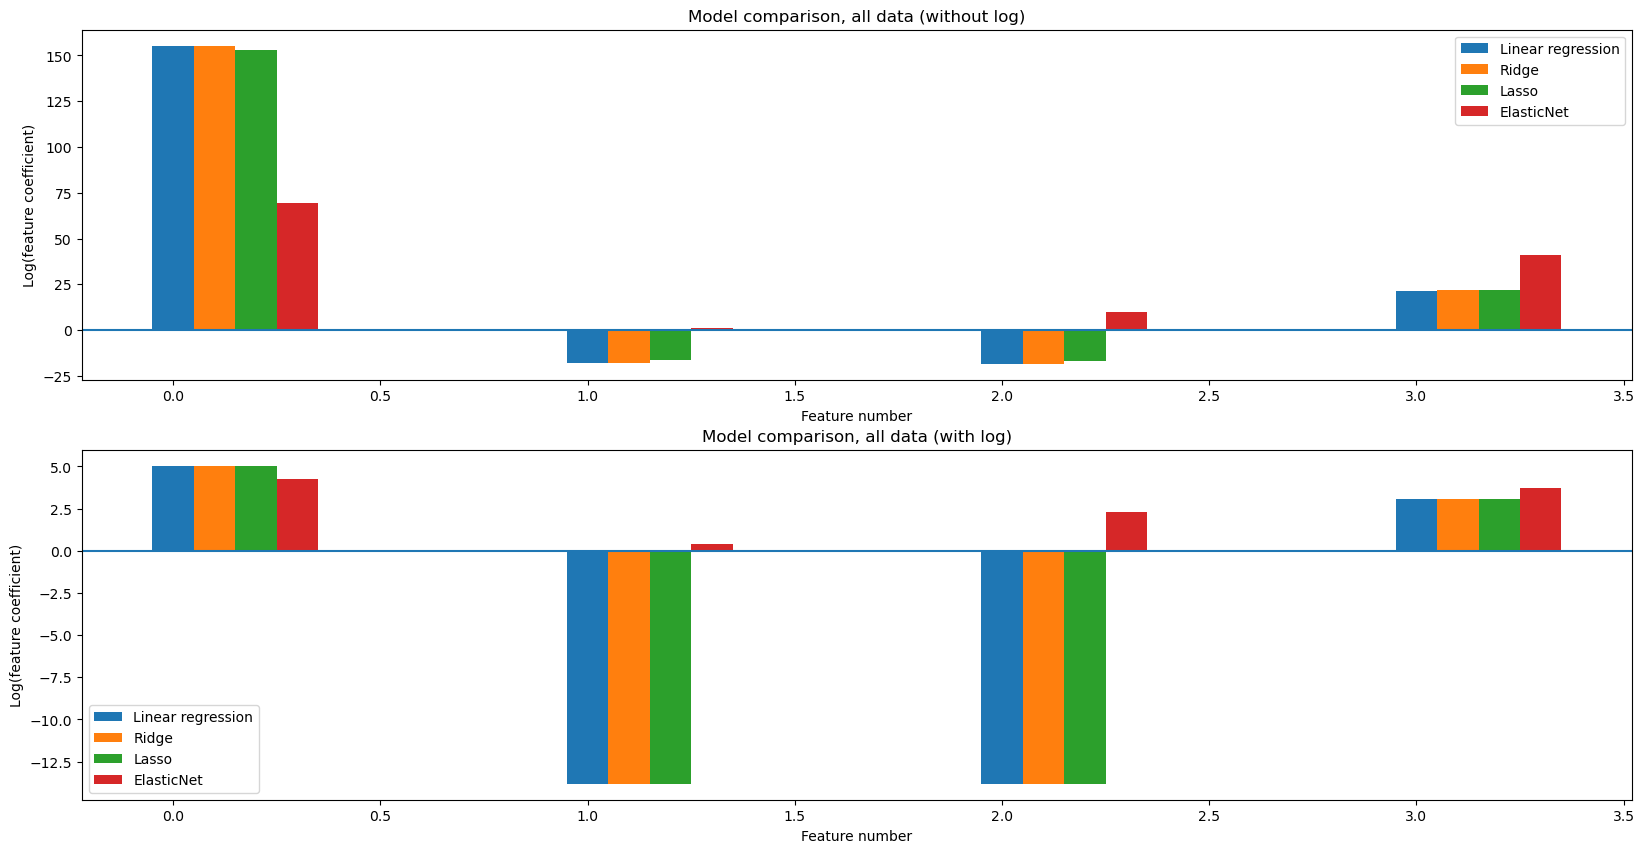

In [137]:
# Code employed from HW 8, to store MSEs and coefficients for 3 diff models.
# Modified to include Elastic Net as well!

X_all_train, X_all_test, y_all_train, y_all_test = get_Xy(df_3_pivot, 
                                                          ['Magnesium'], 
'Magnesium', 0.3, random_state=41)

import sklearn

Models = [LinearRegression, Ridge, Lasso, ElasticNet]
modelNames = ["Linear regression", "Ridge", "Lasso", "ElasticNet"]

mse_all = np.full(len(Models), np.nan)
coef_all = np.full((X_all_train.shape[1], len(Models)), np.nan)

for m, Model in enumerate(Models):
    mse_all[m], coef_all[:, m] = fit_model(Model, X_all_train, X_all_test, y_all_train, y_all_test)

coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))

ind = np.arange(coef_all.shape[0])
width = 0.1
pos = [ind + i * width for i in range(len(Models))]

plt.figure(figsize=(20, 10))
plt.subplot(211)
for i in range(len(Models)):
    plt.bar(pos[i], height=coef_all[:, i], width=width, label=modelNames[i])

plt.legend()
plt.xlabel("Feature number")
plt.ylabel("Log(feature coefficient)")
plt.title("Model comparison, all data (without log)")
plt.axhline()


plt.subplot(212)
for i in range(len(Models)):
    plt.bar(pos[i], height=coef_all_log[:, i], width=width, label=modelNames[i])

plt.legend()
plt.xlabel("Feature number")
plt.ylabel("Log(feature coefficient)")
plt.title("Model comparison, all data (with log)")
plt.axhline()

plt.show()

In [138]:
# Finding the lowest MSE option

for i in range(4):
    print(str(modelNames[i] + " MSE: " + str(mse_all[i])))

print("Naive Prediction, predicting mean pH for all: " + str(np.mean((df_3_pivot['Magnesium'] - np.mean(df_3_pivot['Magnesium']))**2)))

Linear regression MSE: 2264.0658841499803
Ridge MSE: 2266.3451632452575
Lasso MSE: 2283.7496742118565
ElasticNet MSE: 6518.13102953574
Naive Prediction, predicting mean pH for all: 27959.95024067028


In [139]:
df_3_pivot.to_csv("timothy_magnesium.csv")

In [161]:
import pandas as pd
import itertools
from collections import Counter

# Load your dataset into `df`
# Example: df = pd.read_csv("your_dataset.csv")

# Exclude irrelevant columns (like identifiers, dates, etc.)
columns_to_exclude = ["ActivityIdentifier", "ProjectIdentifier", 
                      "ActivityStartDate", "ActivityStartTime/Time_PST", 
                      "LongitudeMeasure", "LatitudeMeasure"]
df_relevant = df_3_pivot.drop(columns=columns_to_exclude, errors='ignore')

# Step 1: Convert data to binary (1 = measured, 0 = not measured)
binary_matrix = df_relevant.notna().astype(int)

# Step 2: Filter rows with at least 2 or 3 measurements (set threshold)
min_measurements = 3
filtered_matrix = binary_matrix[binary_matrix.sum(axis=1) >= min_measurements]

# Step 3: Count the frequency of trait combinations
# Create a frozenset for each row's non-NaN columns and count occurrences
trait_combinations = filtered_matrix.apply(
    lambda row: frozenset(row[row == 1].index), axis=1
)
combination_counts = Counter(trait_combinations)

# Step 4: Filter combinations to include only those with the specified traits
# required_traits = {"pH", "Specific conductance", "Nitrate", "Turbidity"}
# filtered_combinations = {
#     combo: count for combo, count in combination_counts.items() if required_traits.intersection(combo)
# }

# Step 5: Sort and display the most common combinations
most_common_combinations = Counter(combination_counts).most_common(20)  # Top 20 combinations

print("Most Common Water Quality Trait Combinations Including Any of pH, Specific Conductance, Nitrate, and Turbidity:")
for combo, count in most_common_combinations:
    print(f"Traits: {list(combo)}, Count: {count}")


Most Common Water Quality Trait Combinations Including Any of pH, Specific Conductance, Nitrate, and Turbidity:
Traits: ['Magnesium', 'Sodium', 'Sodium, percent total cations', 'Potassium', 'Calcium'], Count: 1807


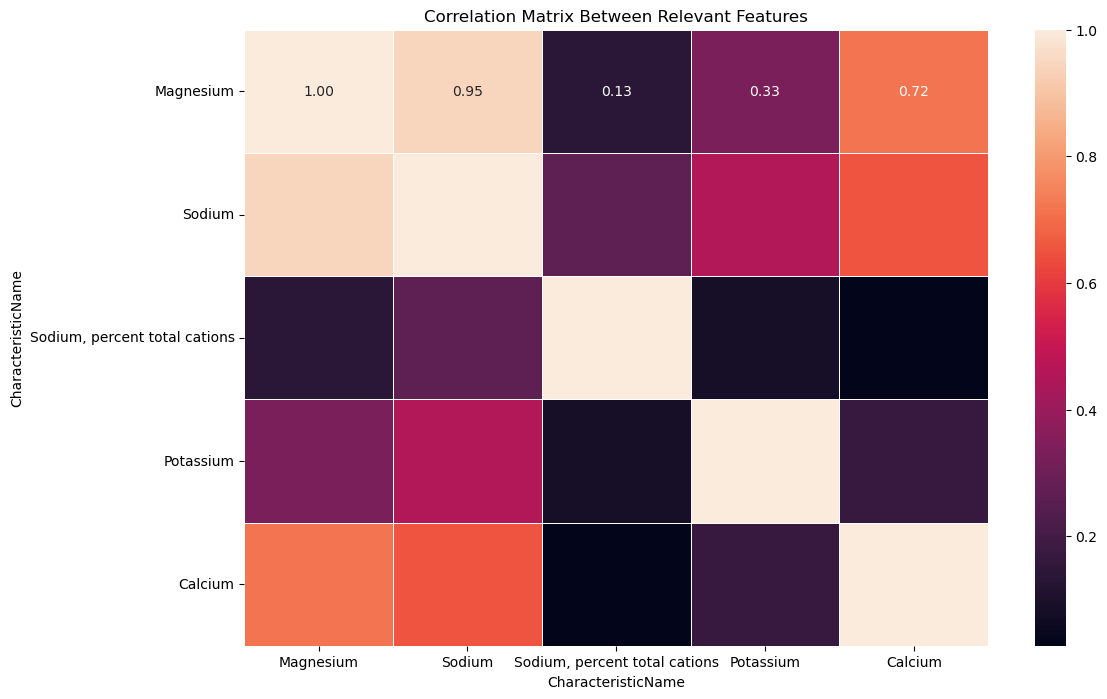

In [131]:
cols = ['Magnesium', 'Sodium', 'Sodium, percent total cations', 'Potassium', 'Calcium']
df_4 = df_3_pivot[cols].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_4.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Between Relevant Features')
plt.show()

In [170]:
zip_file_path = "final_data/final_csv_wq_825.csv.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df_bio_metadata = pd.read_csv(f, low_memory=False)

df_bio_metadata

NameError: name 'df_big' is not defined

In [171]:
df_bio_metadata

,Unnamed: 0.1,Unnamed: 0,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,...,LabSamplePreparationMethod/MethodName,LabSamplePreparationMethod/MethodQualifierTypeName,LabSamplePreparationMethod/MethodDescriptionText,PreparationStartDate,PreparationStartTime/Time,PreparationStartTime/TimeZoneCode,PreparationEndDate,PreparationEndTime/Time,PreparationEndTime/TimeZoneCode,SubstitutionDilutionFactorNumeric
0,0,0.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810785,Sample-Routine,Water,Surface Water,1978-06-13,06:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619385,1029850,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902343,Sample-Routine,Water,NaN,2024-01-01,10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619386,1029851,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902345,Sample-Routine,Water,NaN,2024-01-01,10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619387,1029852,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902346,Sample-Routine,Water,NaN,2024-01-01,09:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619388,1029853,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902344,Sample-Routine,Water,NaN,2024-01-01,10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
combined_df.to_csv("final_Csv_wq_105.csv")

In [172]:
# Concatenate the two DataFrames
combined_df = pd.concat([df_bio_metadata, final_dataframe], axis=0, ignore_index=True)

# Drop duplicates based on 'CharacteristicName' and 'ActivityIdentifier'
combined_df = combined_df.drop_duplicates(subset=['CharacteristicName', 'ActivityIdentifier'])

combined_df


,Unnamed: 0.1,Unnamed: 0,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,...,LabSamplePreparationMethod/MethodName,LabSamplePreparationMethod/MethodQualifierTypeName,LabSamplePreparationMethod/MethodDescriptionText,PreparationStartDate,PreparationStartTime/Time,PreparationStartTime/TimeZoneCode,PreparationEndDate,PreparationEndTime/Time,PreparationEndTime/TimeZoneCode,SubstitutionDilutionFactorNumeric
0,0.0,0.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,USGS-CA,USGS California Water Science Center,nwisca.01.97810785,Sample-Routine,Water,Surface Water,1978-06-13,06:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619385,1029850.0,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902343,Sample-Routine,Water,NaN,2024-01-01,10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619386,1029851.0,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902345,Sample-Routine,Water,NaN,2024-01-01,10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619387,1029852.0,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902346,Sample-Routine,Water,NaN,2024-01-01,09:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619388,1029853.0,NaN,CABEACH_WQX,California State Water Resource Control Board,CABEACH_WQX-2902344,Sample-Routine,Water,NaN,2024-01-01,10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
combined_df[combined_df["CharacteristicName"].isin(["Magnesium","Sodium","Sodium, percent total cations","Potassium","Calcium"])]

,Unnamed: 0.1,Unnamed: 0,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,...,LabSamplePreparationMethod/MethodName,LabSamplePreparationMethod/MethodQualifierTypeName,LabSamplePreparationMethod/MethodDescriptionText,PreparationStartDate,PreparationStartTime/Time,PreparationStartTime/TimeZoneCode,PreparationEndDate,PreparationEndTime/Time,PreparationEndTime/TimeZoneCode,SubstitutionDilutionFactorNumeric
222667,469166.0,NaN,USGS-CA,USGS California Water Science Center,nwisca.01.01103071,Sample-Routine,Water,Groundwater,2011-03-30,14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222668,469167.0,NaN,USGS-CA,USGS California Water Science Center,nwisca.01.01103071,Sample-Routine,Water,Groundwater,2011-03-30,14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222669,469168.0,NaN,USGS-CA,USGS California Water Science Center,nwisca.01.01103071,Sample-Routine,Water,Groundwater,2011-03-30,14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222671,469170.0,NaN,USGS-CA,USGS California Water Science Center,nwisca.01.01103071,Sample-Routine,Water,Groundwater,2011-03-30,14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222672,469171.0,NaN,USGS-CA,USGS California Water Science Center,nwisca.01.01103071,Sample-Routine,Water,Groundwater,2011-03-30,14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593239,1003032.0,NaN,CEDEN,California State Water Resources Control Board,CEDEN--2144509952,Sample-Routine,Water,NaN,2020-01-07,08:35:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593529,1003342.0,NaN,CEDEN,California State Water Resources Control Board,CEDEN--2144504761,Sample-Routine,Water,NaN,2020-01-07,08:35:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593701,1003537.0,NaN,CEDEN,California State Water Resources Control Board,CEDEN--2144485715,Sample-Routine,Water,NaN,2020-03-05,08:24:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593755,1003596.0,NaN,CEDEN,California State Water Resources Control Board,CEDEN--2144509952,Sample-Routine,Water,NaN,2020-01-07,08:35:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
final_dataframe

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,LabSamplePreparationUrl,LastUpdated,ProviderName
0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,nwisca.01.97810785,Sample-Routine,Water,Surface Water,1978-06-13,06:12:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465329,CADWR,California Department of Water Resources,CADWR-1-092002-0,Field Msr/Obs,Water,NaN,2002-09-12,11:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465330,CADWR,California Department of Water Resources,CADWR-1-112002-0,Field Msr/Obs,Water,NaN,2002-11-06,10:42:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465331,CADWR,California Department of Water Resources,CADWR-1-112002-0,Field Msr/Obs,Water,NaN,2002-11-06,10:42:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465332,CADWR,California Department of Water Resources,CADWR-1-092002-0,Field Msr/Obs,Water,NaN,2002-09-12,11:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


In [168]:
import os
import zipfile
import pandas as pd

# Folder containing all the ZIP files
zip_folder_path = "extracted_files_2"

# List to store individual DataFrames
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(zip_folder_path):
    # Check if the file is a ZIP file
    if file_name.endswith('.zip'):
        zip_file_path = os.path.join(zip_folder_path, file_name)
        
        # Open the ZIP file
        with zipfile.ZipFile(zip_file_path, 'r') as z:
            # Get the list of files in the ZIP
            file_names = z.namelist()
            
            # Find all CSV files in the ZIP
            csv_files = [name for name in file_names if name.endswith('.csv')]
            
            # Process each CSV file
            for csv_file_name in csv_files:
                with z.open(csv_file_name) as f:
                    # Read the CSV into a DataFrame
                    df = pd.read_csv(f, low_memory=False)
                    # Append the DataFrame to the list
                    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
if dataframes:
    final_dataframe = pd.concat(dataframes, ignore_index=True)
    print("All CSV files have been concatenated into a single DataFrame.")
    print(final_dataframe.head())
final_dataframe

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,LabSamplePreparationUrl,LastUpdated,ProviderName
0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,nwisca.01.97810785,Sample-Routine,Water,Surface Water,1978-06-13,06:12:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465329,CADWR,California Department of Water Resources,CADWR-1-092002-0,Field Msr/Obs,Water,NaN,2002-09-12,11:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465330,CADWR,California Department of Water Resources,CADWR-1-112002-0,Field Msr/Obs,Water,NaN,2002-11-06,10:42:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465331,CADWR,California Department of Water Resources,CADWR-1-112002-0,Field Msr/Obs,Water,NaN,2002-11-06,10:42:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465332,CADWR,California Department of Water Resources,CADWR-1-092002-0,Field Msr/Obs,Water,NaN,2002-09-12,11:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


In [24]:
import os
import zipfile
import pandas as pd

# Folder containing all the ZIP files
zip_folder_path = "results_phys_chem"

# List to store individual DataFrames
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(zip_folder_path):
    # Check if the file is a ZIP file
    if file_name.endswith('.zip'):
        zip_file_path = os.path.join(zip_folder_path, file_name)
        
        # Open the ZIP file
        with zipfile.ZipFile(zip_file_path, 'r') as z:
            # Get the list of files in the ZIP
            file_names = z.namelist()
            
            # Find all CSV files in the ZIP
            csv_files = [name for name in file_names if name.endswith('.csv')]
            
            # Process each CSV file
            for csv_file_name in csv_files:
                with z.open(csv_file_name) as f:
                    # Read the CSV into a DataFrame
                    df = pd.read_csv(f, low_memory=False)
                    # Append the DataFrame to the list
                    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
if dataframes:
    final_dataframe = pd.concat(dataframes, ignore_index=True)
    print("All CSV files have been concatenated into a single DataFrame.")
    print(final_dataframe.head())
final_dataframe

All CSV files have been concatenated into a single DataFrame.
  OrganizationIdentifier                OrganizationFormalName  \
0                USGS-CA  USGS California Water Science Center   
1                USGS-CA  USGS California Water Science Center   
2                USGS-CA  USGS California Water Science Center   
3                USGS-CA  USGS California Water Science Center   
4                USGS-CA  USGS California Water Science Center   

   ActivityIdentifier ActivityTypeCode ActivityMediaName  \
0  nwisca.01.97810617   Sample-Routine             Water   
1  nwisca.01.97810617   Sample-Routine             Water   
2  nwisca.01.97810826   Sample-Routine             Water   
3  nwisca.01.97810826   Sample-Routine             Water   
4  nwisca.01.97810785   Sample-Routine             Water   

  ActivityMediaSubdivisionName ActivityStartDate ActivityStartTime/Time  \
0                Surface Water        1977-11-09               13:20:00   
1                Surface Water

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,LabSamplePreparationUrl,LastUpdated,ProviderName
0,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
1,USGS-CA,USGS California Water Science Center,nwisca.01.97810617,Sample-Routine,Water,Surface Water,1977-11-09,13:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
2,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-CA,USGS California Water Science Center,nwisca.01.97810826,Sample-Routine,Water,Surface Water,1978-09-19,13:52:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-CA,USGS California Water Science Center,nwisca.01.97810785,Sample-Routine,Water,Surface Water,1978-06-13,06:12:00,PDT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465329,CADWR,California Department of Water Resources,CADWR-1-092002-0,Field Msr/Obs,Water,NaN,2002-09-12,11:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465330,CADWR,California Department of Water Resources,CADWR-1-112002-0,Field Msr/Obs,Water,NaN,2002-11-06,10:42:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465331,CADWR,California Department of Water Resources,CADWR-1-112002-0,Field Msr/Obs,Water,NaN,2002-11-06,10:42:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
465332,CADWR,California Department of Water Resources,CADWR-1-092002-0,Field Msr/Obs,Water,NaN,2002-09-12,11:20:00,PST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


In [63]:
filtered_df_bio

,OrganizationIdentifier,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,ProjectIdentifier,MonitoringLocationIdentifier
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,Historical,NaN,USGS-374336122201201
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,Historical,NaN,USGS-374336122201201
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,Historical,NaN,USGS-374336122201201
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,Historical,NaN,USGS-374336122201201
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,Historical,NaN,USGS-374336122201201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465329,CADWR,CADWR-1-092002-0,2002-09-12,11:20:00,PST,NaN,Specific conductance,19010.0,umho/cm,NaN,Final,DFGSTMWT,CADWR-720.00
465330,CADWR,CADWR-1-112002-0,2002-11-06,10:42:00,PST,NaN,Specific conductance,15290.0,umho/cm,NaN,Final,DFGSTMWT,CADWR-720.00
465331,CADWR,CADWR-1-112002-0,2002-11-06,10:42:00,PST,NaN,Specific conductance,12970.0,umho/cm,NaN,Final,DFGSTMWT,CADWR-720.00
465332,CADWR,CADWR-1-092002-0,2002-09-12,11:20:00,PST,NaN,"Temperature, water",19.0,deg C,NaN,Final,DFGSTMWT,CADWR-720.00


In [158]:
final_dataframe.to_csv("final_dataset_wq.csv")

In [25]:
filtered_df_bio = final_dataframe[[
    "OrganizationIdentifier", 
    "ActivityIdentifier",
    "ActivityStartDate", 
    "ActivityStartTime/Time",	
    "ActivityStartTime/TimeZoneCode",
    "ActivityEndDate", 
    "CharacteristicName", 
    "ResultMeasureValue",
    "ResultMeasure/MeasureUnitCode", 
    "MeasureQualifierCode",
    "ResultStatusIdentifier",
    "ProjectIdentifier",
    "MonitoringLocationIdentifier"
    
]]

filtered_df_bio.head()

,OrganizationIdentifier,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,ProjectIdentifier,MonitoringLocationIdentifier
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,Historical,NaN,USGS-374336122201201
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33,ppth,NaN,Historical,NaN,USGS-374336122201201
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,Historical,NaN,USGS-374336122201201
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30,ppth,NaN,Historical,NaN,USGS-374336122201201
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,Historical,NaN,USGS-374336122201201


In [26]:
# Data Cleaning to drop Nans, and merging

filtered_df_bio = filtered_df_bio.dropna(subset=["ResultMeasureValue"])
filtered_df_bio['ResultMeasureValue'] = pd.to_numeric(filtered_df_bio['ResultMeasureValue'], errors='coerce')
filtered_df_bio.head()

,OrganizationIdentifier,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,CharacteristicName,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,ProjectIdentifier,MonitoringLocationIdentifier
0,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,"Temperature, water",15.4,deg C,NaN,Historical,NaN,USGS-374336122201201
1,USGS-CA,nwisca.01.97810617,1977-11-09,13:20:00,PST,NaN,Salinity,33.0,ppth,NaN,Historical,NaN,USGS-374336122201201
2,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,"Temperature, water",17.4,deg C,NaN,Historical,NaN,USGS-374336122201201
3,USGS-CA,nwisca.01.97810826,1978-09-19,13:52:00,PDT,NaN,Salinity,30.0,ppth,NaN,Historical,NaN,USGS-374336122201201
4,USGS-CA,nwisca.01.97810785,1978-06-13,06:12:00,PDT,NaN,"Temperature, water",15.5,deg C,NaN,Historical,NaN,USGS-374336122201201


In [27]:
water_quality_df_pivot = filtered_df_bio.pivot_table(
    index='ActivityIdentifier',
    columns='CharacteristicName',
    values='ResultMeasureValue'
).reset_index()

In [28]:
water_quality_df_pivot

CharacteristicName,ActivityIdentifier,Absorbance at 280 nanometers,Absorbance at 370 nanometers,Absorbance at 412 nm,Absorbance at 440 nm,Absorption spectral slope (Sag),"Acidity, (H+)",Alkalinity,"Alkalinity, total",Barometric pressure,...,Total fixed solids,Total solids,Total suspended solids,Total volatile solids,Turbidity,UV 254,Velocity - stream,Volatile suspended solids,Weather condition (WMO code 4501) (choice list),pH
0,11NPSWRD_WQX-GOGA_CCSF_OM08_19890110_1433627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11NPSWRD_WQX-GOGA_CCSF_OM08_19890110_1433629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11NPSWRD_WQX-GOGA_CCSF_OM08_19890110_1433631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.47
4,11NPSWRD_WQX-GOGA_CCSF_OM08_19890221_1433633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60946,nwisca.01.99902542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60947,nwisca.01.99902543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60948,nwisca.01.99902544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60949,nwisca.01.99902545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
import pandas as pd
import itertools
from collections import Counter

# Load your dataset into `df`
# Example: df = pd.read_csv("your_dataset.csv")

# Exclude irrelevant columns (like identifiers, dates, etc.)
columns_to_exclude = ["ActivityIdentifier", "ProjectIdentifier", 
                      "ActivityStartDate", "ActivityStartTime/Time_PST", 
                      "LongitudeMeasure", "LatitudeMeasure"]
df_relevant = water_quality_df_pivot.drop(columns=columns_to_exclude, errors='ignore')

# Step 1: Convert data to binary (1 = measured, 0 = not measured)
binary_matrix = df_relevant.notna().astype(int)

# Step 2: Filter rows with at least 2 or 3 measurements (set threshold)
min_measurements = 2
filtered_matrix = binary_matrix[binary_matrix.sum(axis=1) >= min_measurements]

# Step 3: Count the frequency of trait combinations
# Create a frozenset for each row's non-NaN columns and count occurrences
trait_combinations = filtered_matrix.apply(
    lambda row: frozenset(row[row == 1].index), axis=1
)
combination_counts = Counter(trait_combinations)

# Step 4: Filter combinations to include only those with the specified traits
# required_traits = {"pH", "Specific conductance", "Nitrate", "Turbidity"}
# filtered_combinations = {
#     combo: count for combo, count in combination_counts.items() if required_traits.intersection(combo)
# }

# Step 5: Sort and display the most common combinations
most_common_combinations = Counter(combination_counts).most_common(20)  # Top 20 combinations

print("Most Common Water Quality Trait Combinations Including Any of pH, Specific Conductance, Nitrate, and Turbidity:")
for combo, count in most_common_combinations:
    print(f"Traits: {list(combo)}, Count: {count}")


Most Common Water Quality Trait Combinations Including Any of pH, Specific Conductance, Nitrate, and Turbidity:
Traits: ['pH', 'Specific conductance', 'Temperature, water'], Count: 6123
Traits: ['Suspended Sediment Concentration (SSC)', 'Temperature, water', 'Stream flow, instantaneous'], Count: 2577
Traits: ['Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance'], Count: 2132
Traits: ['Salinity', 'Dissolved oxygen (DO)', 'pH', 'Conductivity', 'Dissolved oxygen saturation', 'Temperature, water', 'Specific conductance'], Count: 1785
Traits: ['Temperature, water', 'Stream flow, instantaneous'], Count: 1424
Traits: ['Specific conductance', 'Temperature, water'], Count: 1294
Traits: ['Temperature, water', 'Suspended Sediment Concentration (SSC)'], Count: 1250
Traits: ['Acidity, (H+)', 'pH', 'Temperature, water', 'Total dissolved solids', 'Specific conductance'], Count: 1141
Traits: ['Stream flow, instantaneous', 'Stream width measur

In [164]:
water_quality_df_pivot[['Turbidity', 'Hardness, Ca, Mg']].dropna(axis = 0)

CharacteristicName,Turbidity,"Hardness, Ca, Mg"
1906,2.1,260.0
1908,4.5,272.0
1910,21.0,320.0
1912,17.0,264.0
1914,3.3,260.0
...,...,...
60326,1.1,146.0
60327,1.2,142.0
60351,2.0,138.0
60352,1.4,134.0


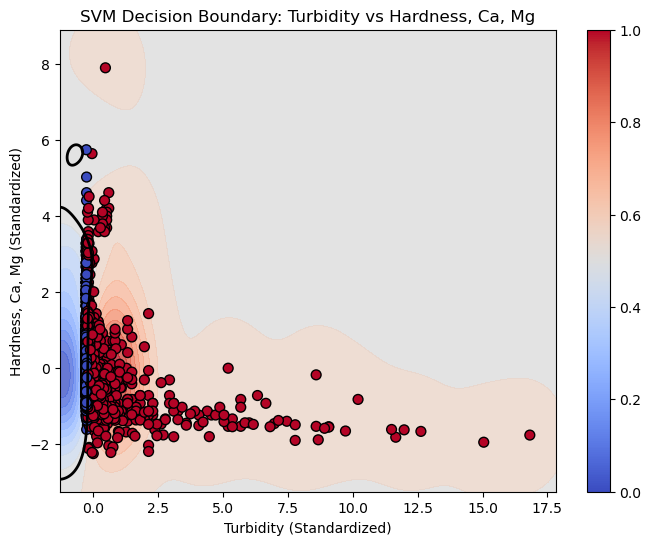

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Subset and clean the data
df_svm = water_quality_df_pivot[['Turbidity', 'Hardness, Ca, Mg']].dropna(axis=0)

# Define features (X) and target (y)
# Create a synthetic binary target variable for SVM clustering
X = df_svm.values
y = np.where(df_svm['Turbidity'] > df_svm['Turbidity'].median(), 1, 0)  # Binary classes based on Turbidity median

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_rbf.fit(X_scaled, y)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap='coolwarm', alpha=0.8)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # Decision boundary
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=50)
plt.xlabel("Turbidity (Standardized)")
plt.ylabel("Hardness, Ca, Mg (Standardized)")
plt.title("SVM Decision Boundary: Turbidity vs Hardness, Ca, Mg")
plt.colorbar()
plt.show()


In [64]:
water_quality_df_pivot[['Acidity, (H+)', 'Hardness, Ca, Mg', 'Alkalinity', 'pH', 'Hardness, non-carbonate', 'Sodium adsorption ratio [(Na)/(sq root of 1/2 Ca + Mg)]', 'Temperature, water', 'Total dissolved solids', 'Specific conductance']].dropna(axis = 0)

CharacteristicName,"Acidity, (H+)","Hardness, Ca, Mg",Alkalinity,pH,"Hardness, non-carbonate",Sodium adsorption ratio [(Na)/(sq root of 1/2 Ca + Mg)],"Temperature, water",Total dissolved solids,Specific conductance
29623,0.00003,294.0,206.0,7.60,88.0,2.19,20.0,369.583333,955.0
29634,0.00001,292.0,261.0,8.25,31.0,0.90,13.5,272.190000,660.5
31349,0.00004,413.0,311.0,7.55,102.0,0.62,19.5,347.903333,883.5
39353,0.00002,228.0,136.0,7.70,92.0,0.69,20.0,125.670000,504.5
39374,0.00002,242.0,124.0,7.70,118.0,0.71,16.2,127.170000,526.0
...,...,...,...,...,...,...,...,...,...
58564,0.00001,120.0,101.5,8.15,19.5,0.60,13.5,56.680000,296.0
58565,0.00002,28.0,30.0,7.50,0.0,0.40,11.5,15.093333,81.0
58566,0.00001,150.0,124.0,8.15,24.0,0.70,13.5,69.986667,353.5
58567,0.00001,230.0,196.0,8.15,31.0,0.70,15.0,115.206667,524.5


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

good before

cols = ['Acidity, (H+)', 'Salinity', 'pH', 'Light attenuation coefficient', 'Temperature, water', 'Specific conductance'] --> pH

cols = ['Acidity, (H+)', 'Hardness, Ca, Mg', 'pH', 'Turbidity', 'Temperature, water', 'Stream flow, instantaneous', 'Total dissolved solids', 'Specific conductance'] --> turbidity



In [159]:
df_specific_big

CharacteristicName,"Acidity, (H+)",pH,"Temperature, water",Total dissolved solids,Specific conductance
29623,0.00003,7.60,20.0,369.583333,955.0
29630,0.00001,7.95,17.7,393.535000,1475.0
29634,0.00001,8.25,13.5,272.190000,660.5
31348,0.00012,7.10,18.5,505.676667,1225.0
31349,0.00004,7.55,19.5,347.903333,883.5
...,...,...,...,...,...
60326,0.00025,7.00,18.5,177.240000,623.0
60327,0.00032,6.95,16.5,178.240000,641.0
60351,0.00002,7.90,23.0,173.735000,633.5
60352,0.00016,7.25,21.5,173.735000,627.0


Mean Squared Error (MSE): 0.005963147000274083
R² Score: 0.9706678029327137


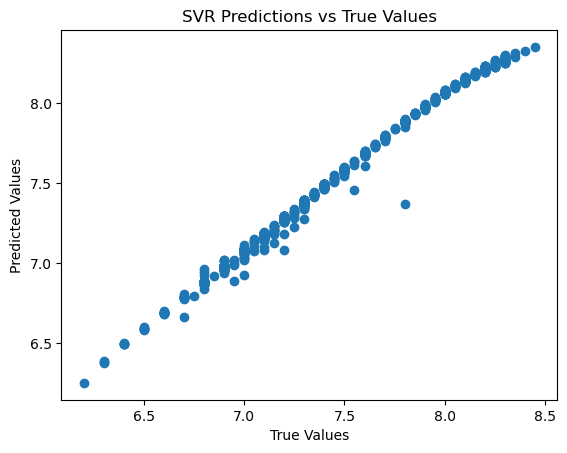

In [148]:
# Define features (X) and target (y)
X = df_specific_big[['Acidity, (H+)', 'pH', 'Temperature, water', 'Total dissolved solids', 'Specific conductance']]
y = df_specific_big['pH']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Radial Basis Function (RBF) kernel
svr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs True Values")
plt.show()


In [150]:
df_specific_big

CharacteristicName,"Acidity, (H+)",pH,"Temperature, water",Total dissolved solids,Specific conductance
29623,0.00003,7.60,20.0,369.583333,955.0
29630,0.00001,7.95,17.7,393.535000,1475.0
29634,0.00001,8.25,13.5,272.190000,660.5
31348,0.00012,7.10,18.5,505.676667,1225.0
31349,0.00004,7.55,19.5,347.903333,883.5
...,...,...,...,...,...
60326,0.00025,7.00,18.5,177.240000,623.0
60327,0.00032,6.95,16.5,178.240000,641.0
60351,0.00002,7.90,23.0,173.735000,633.5
60352,0.00016,7.25,21.5,173.735000,627.0


In [153]:
df.dropna(axis = 0)

CharacteristicName,"Acidity, (H+)",pH,"Temperature, water",Total dissolved solids,Specific conductance,pH_class
29623,0.00003,7.60,20.0,369.583333,955.0,1
29630,0.00001,7.95,17.7,393.535000,1475.0,2
29634,0.00001,8.25,13.5,272.190000,660.5,2
31348,0.00012,7.10,18.5,505.676667,1225.0,0
31349,0.00004,7.55,19.5,347.903333,883.5,1
...,...,...,...,...,...,...
60326,0.00025,7.00,18.5,177.240000,623.0,0
60327,0.00032,6.95,16.5,178.240000,641.0,0
60351,0.00002,7.90,23.0,173.735000,633.5,2
60352,0.00016,7.25,21.5,173.735000,627.0,1


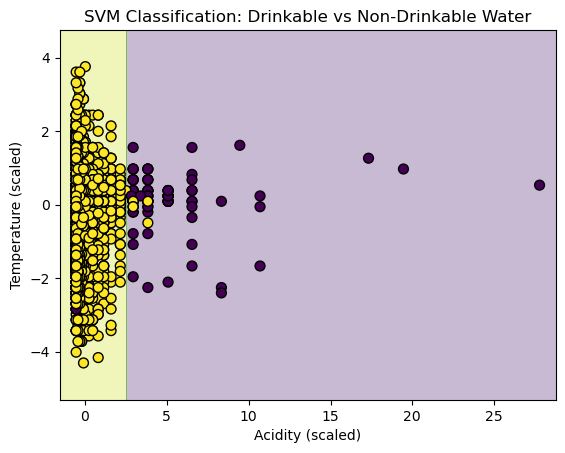

Class Distribution:
pH_class
Good (Drinkable)       5016
Bad (Non-Drinkable)      93
Name: count, dtype: int64


In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the Data
df = df_specific_big.copy().dropna(axis=0)

# Step 2: Create Binary Classes for pH
# Create unique labels first, then map back to 0 (Bad) and 1 (Good)
df['pH_class'] = pd.cut(df['pH'], bins=[0, 6.5, 8.5, 14], labels=['low', 'good', 'high'])
df = df.dropna(subset=['pH_class'])  # Drop rows where pH_class is NaN
df['pH_class'] = df['pH_class'].map({'low': 0, 'good': 1, 'high': 0})  # Map labels to binary

# Step 3: Define Features and Target
X = df[['Acidity, (H+)', 'Temperature, water']]  # Use two features for visualization
y = df['pH_class'].astype(int)  # Ensure pH_class is an integer

# Step 4: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train SVM Classifier
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(X_scaled, y)

# Step 6: Plot the Hyperplanes
def plot_decision_boundaries(model, X, y):
    h = 0.01  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    plt.xlabel("Acidity (scaled)")
    plt.ylabel("Temperature (scaled)")
    plt.title("SVM Classification: Drinkable vs Non-Drinkable Water")
    plt.show()

# Call the function
plot_decision_boundaries(svm_clf, X_scaled, y)

# Print class counts
print("Class Distribution:")
print(df['pH_class'].value_counts().rename(index={1: "Good (Drinkable)", 0: "Bad (Non-Drinkable)"}))


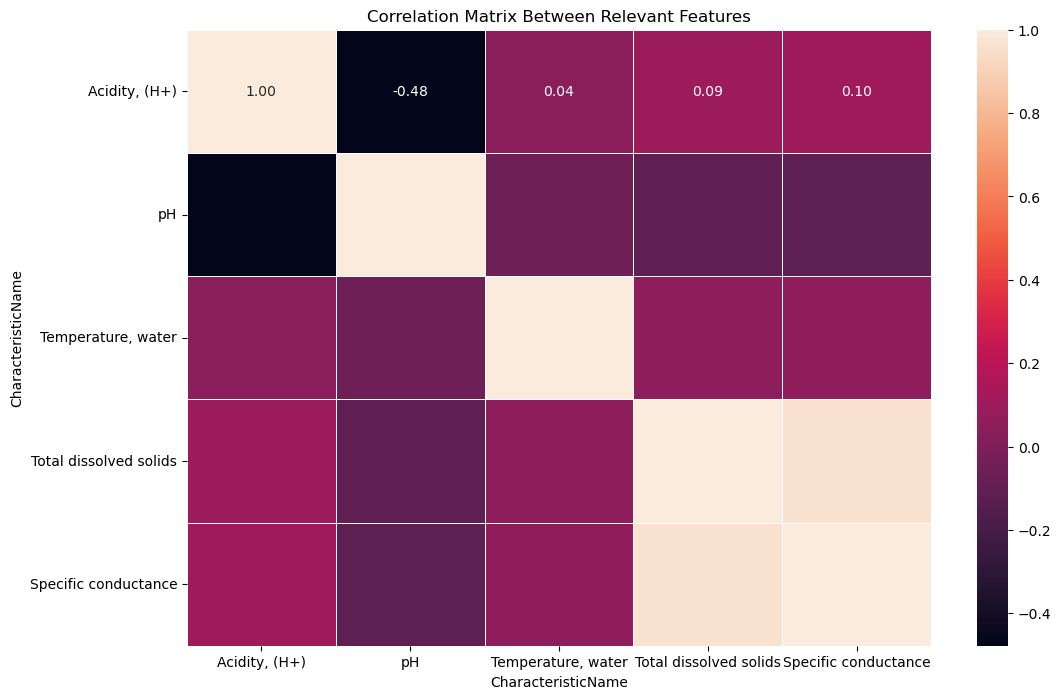

In [110]:
cols = ['Acidity, (H+)', 'pH', 'Temperature, water', 'Total dissolved solids', 'Specific conductance']
df_specific_big = water_quality_df_pivot[cols].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific_big.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Between Relevant Features')
plt.show()

In [111]:
def get_Xy(df, cols_to_drop, y_col, test_size, random_state):
    """
    Function author: Vishali Vallioor, wrote for HW 8.

    Objective: This function returns four dataframes containing the testing and training X and y values used in specific case.
    Input:
        - df: a Pandas dataframe with all of the fields in the land-use regression dataset; 
        - cols_to_drop: a list of the names (strings) of the columns to drop from df in order to obtain the feature variables.
        - y_col: a column name (as a string) of df that represents the response variable
        - test_size: a float between 0 and 1 indicating the fraction of the data to include in the test split
        - random_state, an integer: used to define the random state
    Returns: X_train, X_test, y_train, y_test, four dataframes containing the training and testing subsets of the 
    feature matrix X and response matrix y
    """
    
    X = df.drop(columns = cols_to_drop)
    y = df[y_col]  
    
    scaler = StandardScaler()
    scaler.fit(X) 
    X_stnd = scaler.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

def fit_model(SKL_model, X_train, X_test, y_train, y_test, alpha = 1):
    """
    Function author: Vishali Vallioor, wrote for HW 8.

    Objective: This function fits a model of type SKL_model to the data in the training set of X and y, and finds the MSE on the test set of X and y.
    Inputs: 
        SKL_model: the type of sklearn model with which to fit the data. Options include: LinearRegression, Ridge, or Lasso.
        X_train: the set of features used to train the model.
        y_train: the set of response variable observations used to train the model.
        X_test: the set of features used to test the model.
        y_test: the set of response variable observations used to test the model.
        alpha: the penalty parameter (also known as lambda), to be used with Ridge and Lasso models only.
    Outputs:
        mse: mean squared error
        coef: coefficients of the model  
    """    
    
    if SKL_model == sklearn.linear_model._base.LinearRegression:
        model = SKL_model()
    elif SKL_model == sklearn.linear_model.ElasticNet:
        model = SKL_model(alpha = alpha, l1_ratio = 0.15)
    else:
        model = SKL_model(alpha = alpha)
    
    model.fit(X_train, y_train)
    mse = mean_squared_error(model.predict(X_test), y_test)
    coef = model.coef_.flatten() 
    
    return mse, coef

def check_models(df, alpha, X_all_train, X_all_test, y_all_train, y_all_test, target, width=0.1): 
    
    # Code employed from HW 8, to store MSEs and coefficients for 3 diff models.
    # Modified to include Elastic Net as well!

    Models = [LinearRegression, Ridge, Lasso, ElasticNet]
    modelNames = ["Linear regression", "Ridge", "Lasso", "ElasticNet"]
    
    mse_all = np.full(len(Models), np.nan)
    coef_all = np.full((X_all_train.shape[1], len(Models)), np.nan)
    
    for m, Model in enumerate(Models):
        mse_all[m], coef_all[:, m] = fit_model(Model, X_all_train, X_all_test, y_all_train, y_all_test, alpha)
    
    coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
    
    ind = np.arange(coef_all.shape[0])
    pos = [ind + i * width for i in range(len(Models))]
    
    plt.figure(figsize=(20, 10))
    plt.subplot(211)
    for i in range(len(Models)):
        plt.bar(pos[i], height=coef_all[:, i], width=width, label=modelNames[i])
    
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Log(feature coefficient)")
    plt.title("Model comparison, all data (without log)")
    plt.axhline()
    
    
    plt.subplot(212)
    for i in range(len(Models)):
        plt.bar(pos[i], height=coef_all_log[:, i], width=width, label=modelNames[i])
    
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Log(feature coefficient)")
    plt.title("Model comparison, all data (with log)")
    plt.axhline()
    
    plt.show()

    # Finding the lowest MSE option

    for i in range(4):
        print(str(modelNames[i] + " MSE: " + str(mse_all[i])))
    
    print(f"Naive Prediction, predicting mean {target} for all: " + str(np.mean((df[target] - np.mean(df[target]))**2)))

    return coef_all

In [112]:
df_specific_big

CharacteristicName,"Acidity, (H+)",pH,"Temperature, water",Total dissolved solids,Specific conductance
29623,0.00003,7.60,20.0,369.583333,955.0
29630,0.00001,7.95,17.7,393.535000,1475.0
29634,0.00001,8.25,13.5,272.190000,660.5
31348,0.00012,7.10,18.5,505.676667,1225.0
31349,0.00004,7.55,19.5,347.903333,883.5
...,...,...,...,...,...
60326,0.00025,7.00,18.5,177.240000,623.0
60327,0.00032,6.95,16.5,178.240000,641.0
60351,0.00002,7.90,23.0,173.735000,633.5
60352,0.00016,7.25,21.5,173.735000,627.0


In [117]:
X_all_train, X_all_test, y_all_train, y_all_test = get_Xy(df_specific_big, 
                                                          ['pH'], 
'pH', 0.3, random_state=41)

import sklearn

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_94900/3684760367.py:13: RuntimeWarning: divide by zero encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_94900/3684760367.py:13: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


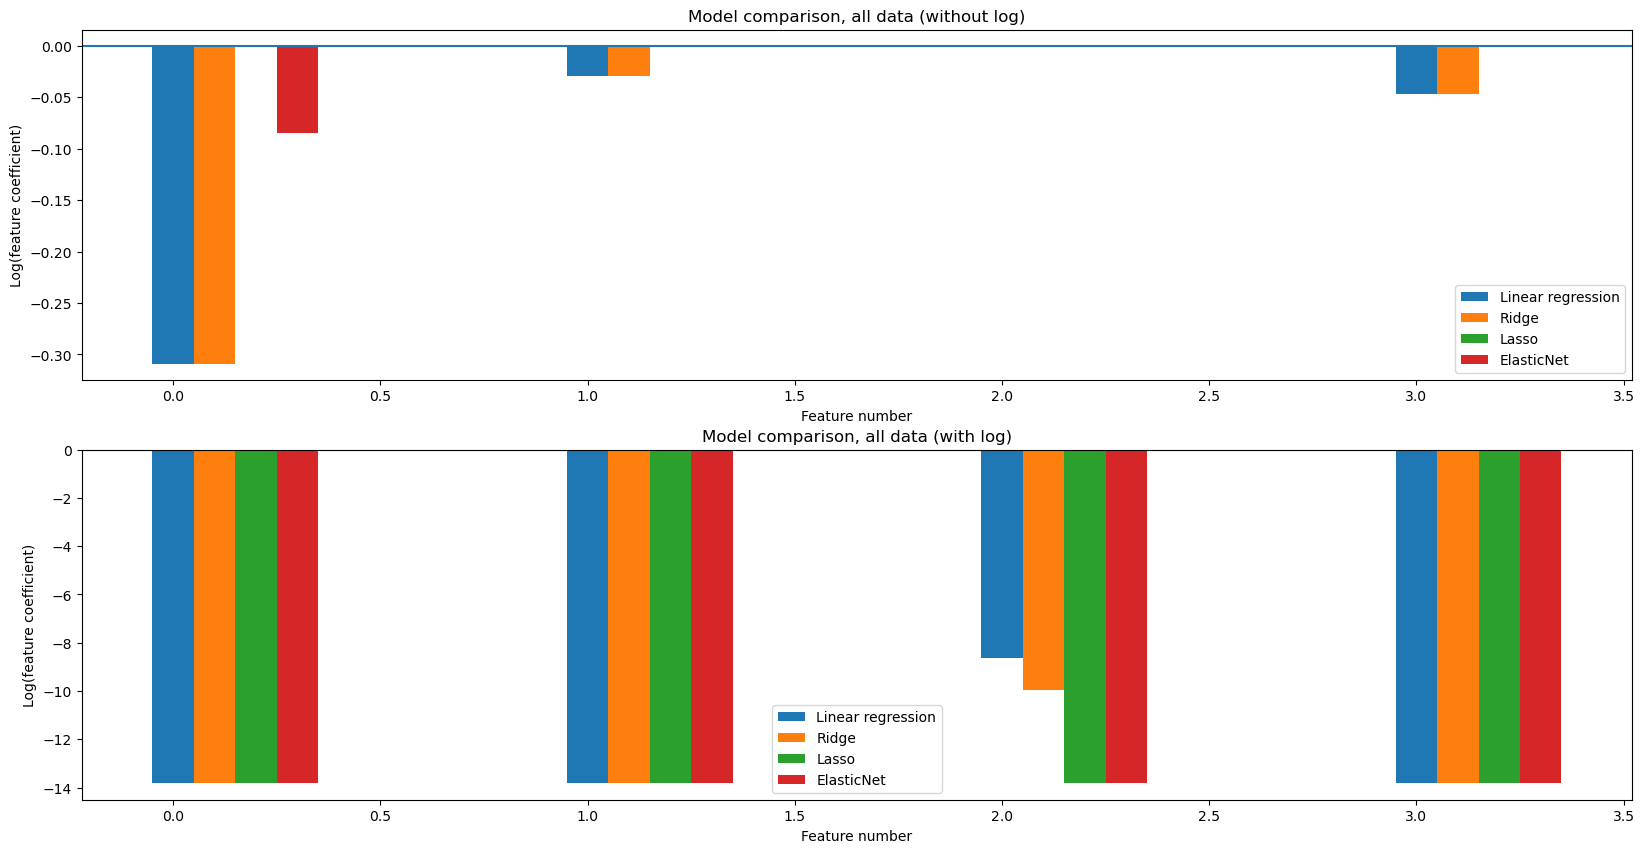

In [118]:
# Code employed from HW 8, to store MSEs and coefficients for 3 diff models.
# Modified to include Elastic Net as well!

Models = [LinearRegression, Ridge, Lasso, ElasticNet]
modelNames = ["Linear regression", "Ridge", "Lasso", "ElasticNet"]

mse_all = np.full(len(Models), np.nan)
coef_all = np.full((X_all_train.shape[1], len(Models)), np.nan)

for m, Model in enumerate(Models):
    mse_all[m], coef_all[:, m] = fit_model(Model, X_all_train, X_all_test, y_all_train, y_all_test)

coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))

ind = np.arange(coef_all.shape[0])
width = 0.1
pos = [ind + i * width for i in range(len(Models))]

plt.figure(figsize=(20, 10))
plt.subplot(211)
for i in range(len(Models)):
    plt.bar(pos[i], height=coef_all[:, i], width=width, label=modelNames[i])

plt.legend()
plt.xlabel("Feature number")
plt.ylabel("Log(feature coefficient)")
plt.title("Model comparison, all data (without log)")
plt.axhline()


plt.subplot(212)
for i in range(len(Models)):
    plt.bar(pos[i], height=coef_all_log[:, i], width=width, label=modelNames[i])

plt.legend()
plt.xlabel("Feature number")
plt.ylabel("Log(feature coefficient)")
plt.title("Model comparison, all data (with log)")
plt.axhline()

plt.show()

In [119]:
# Finding the lowest MSE option

for i in range(4):
    print(str(modelNames[i] + " MSE: " + str(mse_all[i])))

print("Naive Prediction, predicting mean pH for all: " + str(np.mean((df_specific_big['pH'] - np.mean(df_specific_big['pH']))**2)))

Linear regression MSE: 0.1040200577444636
Ridge MSE: 0.10401782312229821
Lasso MSE: 0.20904204222886527
ElasticNet MSE: 0.16043933355198162
Naive Prediction, predicting mean pH for all: 0.4267610096468687
